### Project : Chennai House Price Prediction
### Name :Akshaya Srikanth
### Mail :akshayasrikanth97@gmail.com
### Batch :D15




### Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?



### Data

The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

### Minimum Requirements

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

### Objective:

1)The model must be analysed to find the important factors that contribute towards the price.

2)It will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

## 1. Data Collection

### 1.1 Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

### 1.2 Reading the dataset into a pandas dataframe

In [2]:
chennai_dataset=pd.read_csv('train-chennai-sale.csv')

### 1.3 Displaying first five rows of data

In [3]:
chennai_dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


### SUPERVISED REGRESSION PROBLEM.
**We have the target variable "SALES_PRICE" and the type of Target variable is continuous. Since we are trying to predict a continuous value, it is called Regression problem**

In [4]:
print('The total number of data points:',chennai_dataset.shape[0])

The total number of data points: 7109


In [5]:
print('The total number of features:',chennai_dataset.shape[1])

The total number of features: 22


### 1.4 Basic Information on the dataset feature types and missing values

In [6]:
chennai_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### 1.5 Missing values in each column

In [7]:
chennai_dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### 1.6 Heatmap to detect NULL values in the column

<AxesSubplot:>

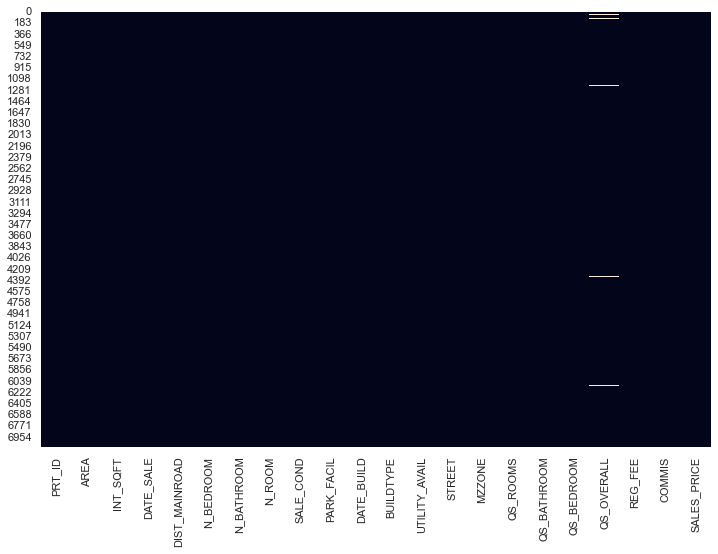

In [8]:
plt.figure(figsize=(12,8))

sns.heatmap(chennai_dataset.isnull(),cbar=False)

## 2. Data Cleaning

### DROP PRT_ID COLUMN SINCE IT IS UNIQUE 

In [9]:
chennai_dataset.drop('PRT_ID',axis=1,inplace=True)

### AREA

In [10]:
chennai_dataset['AREA'].unique()
# Lot of misspelt values they need to corrected

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [11]:
chennai_dataset['AREA'].replace({'Chormpet':'Chrompet'
                                 ,'Chrompt':'Chrompet'
                                 ,'Chrmpet':'Chrompet'
                                 ,'Karapakam':'Karapakkam'
                                 ,'Ana Nagar':'Anna Nagar'
                                 ,'Ann Nagar':'Anna Nagar'
                                 ,'KKNagar':'KK Nagar'
                                 ,'Velchery':'Velachery'
                                 ,'Adyr':'Adyar'
                                 ,'TNagar':'T Nagar'
                                                          
                                },inplace=True)

**Plotting the  AREA value counts after cleaning**

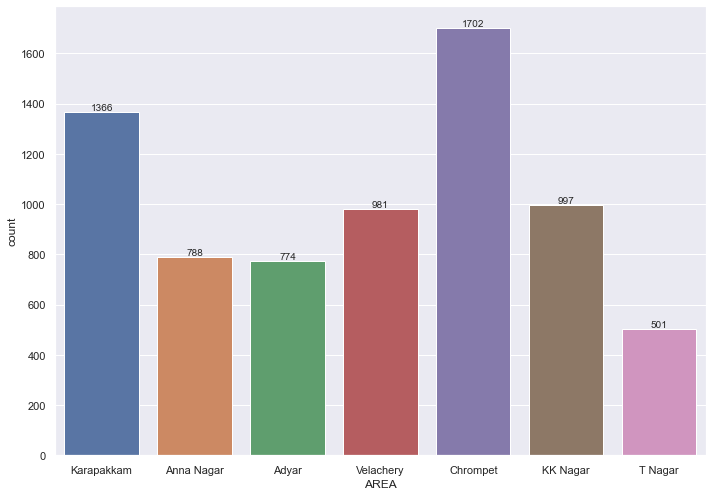

In [12]:
fig= plt.figure(figsize=(10,7))
ax = sns.countplot(x='AREA', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


### INT_SQFT

In [13]:
chennai_dataset['INT_SQFT'].unique()
#No missing or erroreneous values hence no imputation /cleaning required

array([1004, 1986,  909, ...,  688, 2051,  598], dtype=int64)

### DATE_SALE

In [14]:
# Converting the datatype to datetime
chennai_dataset['DATE_SALE']=pd.to_datetime(chennai_dataset['DATE_SALE'])

### DIST_MAINROAD 

In [15]:
chennai_dataset['DIST_MAINROAD'].unique()
#No missing or erroreneous values hence no imputation /cleaning required

array([131,  26,  70,  14,  84,  36, 137, 176, 175,  74,  78, 143,  83,
       157, 148, 134,  69, 168,  53,  96, 114, 100, 111, 105,  29,  59,
       185, 138, 173,  15, 117,  16, 130,  46, 180,  52,  86,  49, 113,
       189,  28,  51,  19, 167, 126,  75, 154,  25, 187, 200,  32,  11,
        23,  13,  58,  89,  48,  39, 177, 116,  41, 192,  72,  24,  43,
        85, 171, 149,  73,  62, 145, 125, 121, 129,   6, 103,   8,  50,
        67,   0, 147,  71,  34, 178, 106, 144, 135,  38,  40, 142,  79,
        20,  99, 166,  63,  44,  60,  90, 169,  10, 122, 108,  98,  57,
       104,  17,   1, 109, 164, 136,  97,  37,   9, 181,  93,  81, 193,
        95, 196, 141, 158, 174,  94, 124,  82,  76, 190, 194,  54,  64,
        65, 153, 115, 102,  77, 182, 163,  88,  66, 119,  18, 188, 112,
       120, 159,   4, 123,  31,   2, 156, 184, 170, 110,   7, 152,  27,
       198, 183,  12,  45, 161,  30, 118,  33,  61, 191, 160, 140,  47,
       146, 128,  80,  55, 151,   3,  92,  22,  35, 101, 127, 19

### N_BEDROOM

In [16]:
chennai_dataset[chennai_dataset['N_BEDROOM'].isnull()]
# There is one missing value

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,Anna Nagar,1556,2013-01-16,181,NaN,1.0,4,Partiall,No,23-01-1986,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [17]:
## Replacing the missing value by the mode(Max occuring value)

chennai_dataset['N_BEDROOM'].fillna(chennai_dataset['N_BEDROOM'].mode()[0],inplace=True)
#print(chennai_dataset['N_BEDROOM'].mode()[0])

In [18]:
#Now there are no missing values
chennai_dataset[chennai_dataset['N_BEDROOM'].isnull()]

#Changing the datatype of N_BEDROOM to int
chennai_dataset['N_BEDROOM']=chennai_dataset['N_BEDROOM'].astype('int')               


### Plotting the N_BEDROOM value counts after cleaning

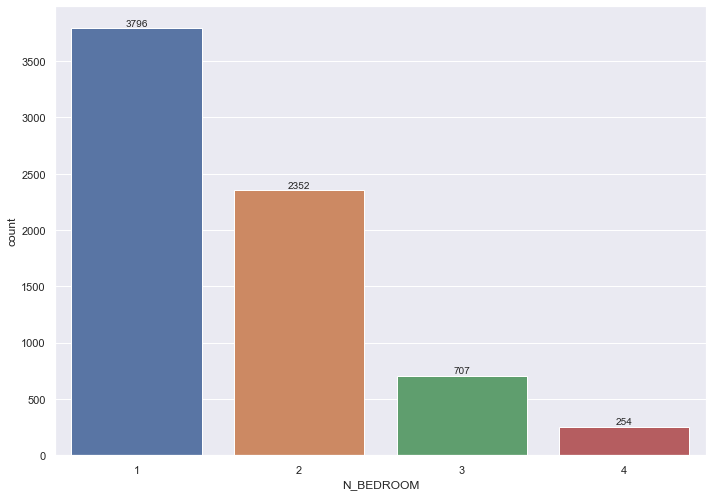

In [19]:
fig= plt.figure(figsize=(10,7))
ax = sns.countplot(x='N_BEDROOM', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### N_BATHROOM

In [20]:
chennai_dataset['N_BATHROOM'].isnull().sum()

5

In [21]:
#Replacing the 5 missing values with the the mode(Max occuring value) of no of bathrooms
chennai_dataset['N_BATHROOM'].fillna(chennai_dataset['N_BATHROOM'].mode()[0],inplace=True)

In [22]:
#Re-Validating if the missing values have been replaced intact.
chennai_dataset['N_BATHROOM'].isnull().sum()

0

In [23]:
#Changing the datatype of N_BATHROOM to int
chennai_dataset['N_BATHROOM']=chennai_dataset['N_BATHROOM'].astype('int')  

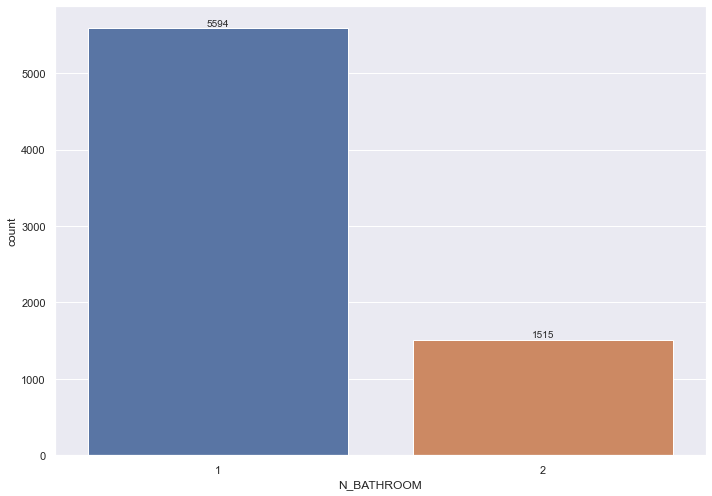

In [24]:
fig= plt.figure(figsize=(10,7))
ax = sns.countplot(x='N_BATHROOM', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### N_ROOM

In [25]:
chennai_dataset['N_ROOM'].isnull().sum()
#No missing or erroreneous values hence no imputation /cleaning required

0

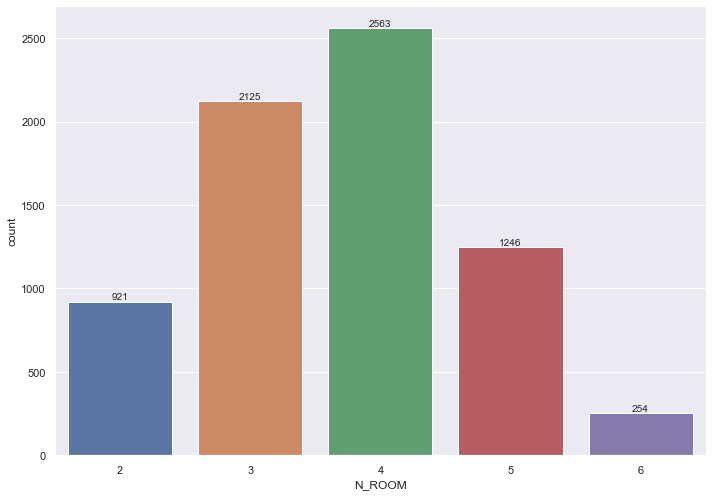

In [26]:
fig= plt.figure(figsize=(10,7))
ax = sns.countplot(x='N_ROOM', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### SALE_COND

In [27]:
chennai_dataset['SALE_COND'].value_counts()
# Misspelt values  need to corrected

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [28]:
chennai_dataset['SALE_COND'].replace({'Adj Land':'AdjLand'
                                      ,'Partiall':'Partial'
                                      ,'PartiaLl':'Partial'
                                      ,'Ab Normal':'AbNormal' },inplace=True)

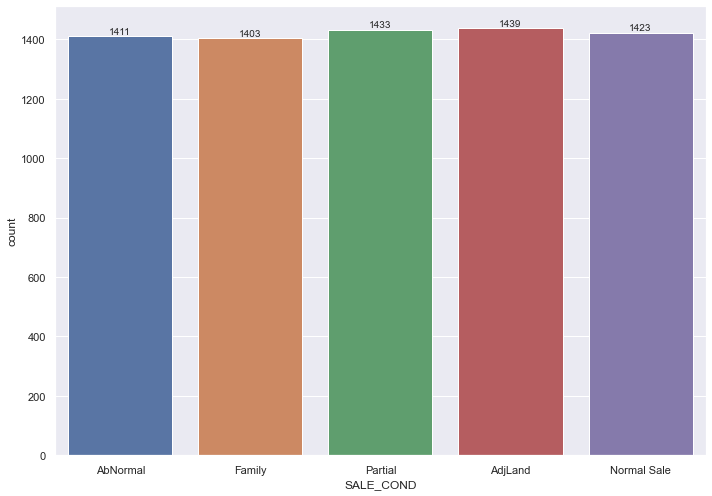

In [29]:
fig= plt.figure(figsize=(10,7))
ax = sns.countplot(x='SALE_COND', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### PARK_FACIL

In [30]:
chennai_dataset['PARK_FACIL'].value_counts()


Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [31]:
#Correcting misspelt value 'NOO'
chennai_dataset['PARK_FACIL'].replace({'Noo':'No'},inplace=True)


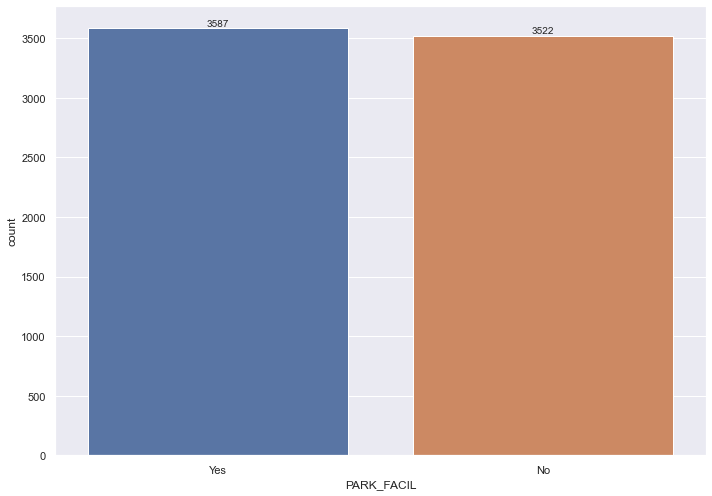

In [32]:
fig= plt.figure(figsize=(10,7))
ax = sns.countplot(x='PARK_FACIL', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### BUILDTYPE

In [33]:
chennai_dataset['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [34]:
#Correcting misspelt value 
chennai_dataset['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'},inplace=True)
chennai_dataset['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

### UTILITY_AVAIL

In [35]:
chennai_dataset['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [36]:
#Correcting misspelt value 
chennai_dataset['UTILITY_AVAIL'].replace({'AllPub':'All Pub', 'NoSewr ':'No Sewa'
                                         ,'NoSeWa':'No Sewa'},inplace=True)
chennai_dataset['UTILITY_AVAIL'].value_counts()

No Sewa    3700
All Pub    1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

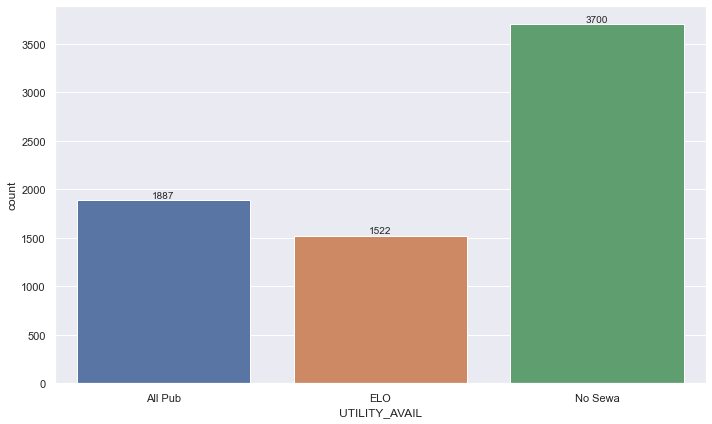

In [37]:
fig= plt.figure(figsize=(10,6))
ax = sns.countplot(x='UTILITY_AVAIL', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### STREET

In [38]:
chennai_dataset['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [39]:
#Correcting misspelt value 
chennai_dataset['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

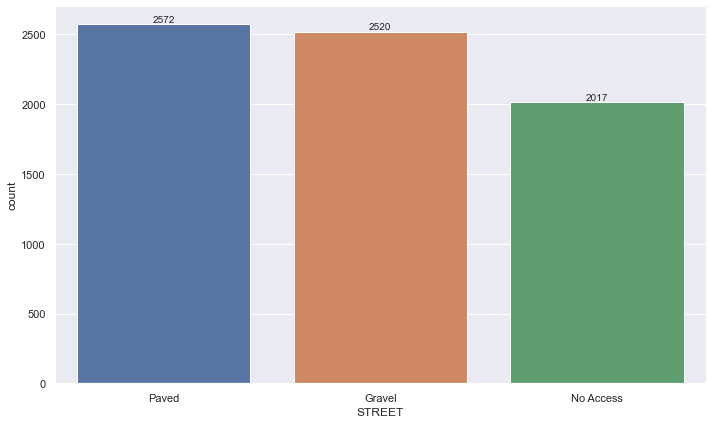

In [40]:
fig= plt.figure(figsize=(10,6))
ax = sns.countplot(x='STREET', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### MZZONE

In [41]:
chennai_dataset['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

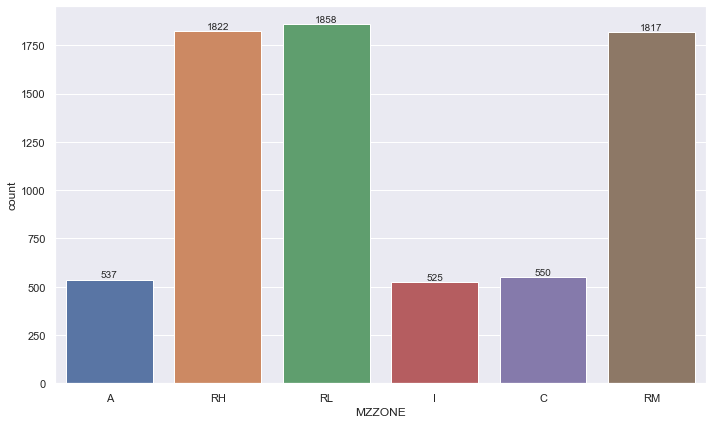

In [42]:
fig= plt.figure(figsize=(10,6))
ax = sns.countplot(x='MZZONE', data=chennai_dataset)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### DATE_BUILD

In [43]:
# Converting to datatype datetime
chennai_dataset['DATE_BUILD']=pd.to_datetime(chennai_dataset['DATE_BUILD'])

### QS_ROOMS

In [44]:
chennai_dataset['QS_ROOMS'].isna().sum()

0

### QS_BATHROOM

In [45]:
chennai_dataset['QS_BATHROOM'].isna().sum()

0

### QS_BEDROOM

In [46]:
chennai_dataset['QS_BEDROOM'].isna().sum()

0

### QS_OVERALL

In [47]:
chennai_dataset['QS_OVERALL'].isna().sum()

48

In [48]:
#There are 48 missing values which are being replaced by the mean value

chennai_dataset['QS_OVERALL'].mean()
chennai_dataset['QS_OVERALL'].fillna(chennai_dataset['QS_OVERALL'].mean(),inplace=True)


In [49]:
#Re-Validating if the missing values have been replaced intact.
chennai_dataset['QS_OVERALL'].isna().sum()

0

### REG_FEE

In [50]:
#No missing or erroreneous values hence no imputation /cleaning required
chennai_dataset['REG_FEE'].isna().sum()

0

### COMMIS

In [51]:
#No missing or erroreneous values hence no imputation /cleaning required
chennai_dataset['COMMIS'].isna().sum()

0

### SALES_PRICE

In [52]:
chennai_dataset['SALES_PRICE'].isna().sum()

0

### Extracting the  only years out of Date  features since the sales prices are not subject to change drastically in the span of an year

In [53]:
chennai_dataset['YEAR_SALE']=chennai_dataset['DATE_SALE'].dt.year
chennai_dataset['YEAR_BUILD']=chennai_dataset['DATE_BUILD'].dt.year

### Drop the date features

In [54]:
chennai_dataset.drop(columns=['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

### Adding new  column 'AGE_BUILD' by taking a difference of 'YEAR_SALE' and 'YEAR_BUILD'

In [55]:
chennai_dataset['AGE_BUILD']=chennai_dataset['YEAR_SALE']-chennai_dataset['YEAR_BUILD']

### REG_FEE and COMMIS would add no value as features in building the ML model hence they could be added to the target salesprice and be dropped

In [56]:
chennai_dataset['SALES_PRICE']=chennai_dataset['SALES_PRICE'] + chennai_dataset['REG_FEE'] + chennai_dataset['COMMIS']

In [57]:
chennai_dataset.drop(columns=['REG_FEE','COMMIS'],inplace=True)

#### Resequencing the Sales_Price column to last for better readabilty

In [58]:
chennai_dataset=chennai_dataset[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',  'YEAR_SALE', 'YEAR_BUILD', 'AGE_BUILD','SALES_PRICE']]

In [59]:
chennai_dataset.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,YEAR_SALE,YEAR_BUILD,AGE_BUILD,SALES_PRICE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,2011,1967,44,8124400
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,2006,1995,11,22781941
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,2012,1992,20,13672408
3,Velachery,1855,14,3,2,5,Family,No,Others,No Sewa,Paved,I,4.7,3.9,3.6,4.010,2010,1988,22,10063653
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,2009,1979,30,7717313


### 3. Exploratory Data Analysis

### 3.1 Check the Normal distribution in target variable

Text(0.5, 1.0, 'Actual Sale Price Histogram')

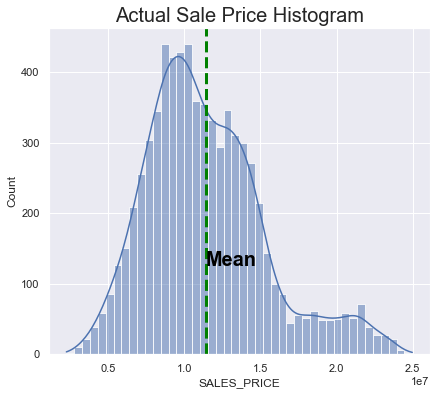

In [60]:
plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,2,1)
data=chennai_dataset.copy()
sns.histplot(data['SALES_PRICE'],palette='Blues_r',kde=True)
plt.axvline(x=data['SALES_PRICE'].mean(), color='green', linestyle='--', linewidth=3)
plt.text(data['SALES_PRICE'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Actual Sale Price Histogram',fontsize=20)

#### The Sales distribution in the right  is skewed 

In [61]:
mean = data['SALES_PRICE'].mean()
std = data['SALES_PRICE'].std()
skew = data['SALES_PRICE'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 11412853.6964, std: 3944957.2280, skew: 0.7791


#### The skewness was about 0.7791. Also, since the metric is RMSLE,so applying LOG Transformation to achieve normal distribution

In [62]:
data['SALES_PRICE'] = np.log(data['SALES_PRICE'])

Text(0.5, 1.0, 'Log Transformed Sale Price Histogram')

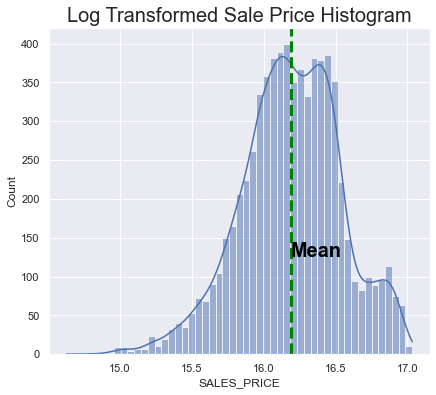

In [63]:
plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,2,1)
sns.histplot(data['SALES_PRICE'],palette='Blues_r',kde=True)
plt.axvline(x=data['SALES_PRICE'].mean(), color='green', linestyle='--', linewidth=3)
plt.text(data['SALES_PRICE'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Log Transformed Sale Price Histogram',fontsize=20)

In [64]:
mean = data['SALES_PRICE'].mean()
std = data['SALES_PRICE'].std()
skew = data['SALES_PRICE'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 16.1908, std: 0.3496, skew: -0.2559


#### Skewness is seen to be improved  to a great extent,skew value is very low.

### 3.2 Correlation for linear relationship findings

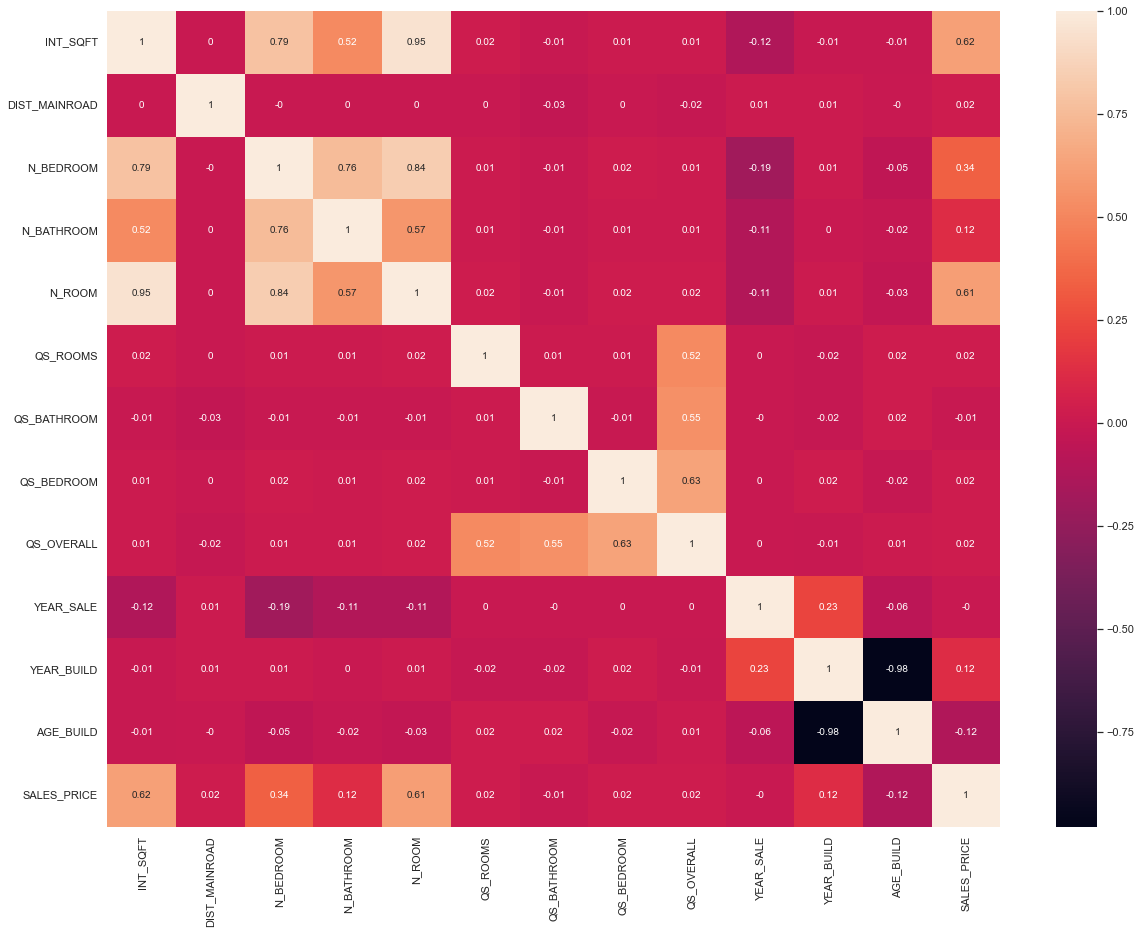

In [65]:
fig=plt.figure(figsize=(20,15))
correation_value=chennai_dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correation_value, annot=True)
#correation_value
plt.show()

#### SalePrice is highly corelated with INT_SQFT,N_ROOM

#### INT_SQFT is highly correlated with N_ROOM hence dropping either of the features should not impact the model

###  3.3 Seperating out discrete and continuous numerical features  to visualize their distributions against the Target 

In [66]:
discrete_feature=['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'YEAR_SALE']
continuous_feature=['INT_SQFT',  'DIST_MAINROAD',  'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','YEAR_BUILD','AGE_BUILD']

In [67]:
print(discrete_feature)
#chennai_dataset.columns

['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'YEAR_SALE']


In [68]:
print(continuous_feature)

['INT_SQFT', 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'YEAR_BUILD', 'AGE_BUILD']


### 3.3.1 Discrete features vs Sale Price

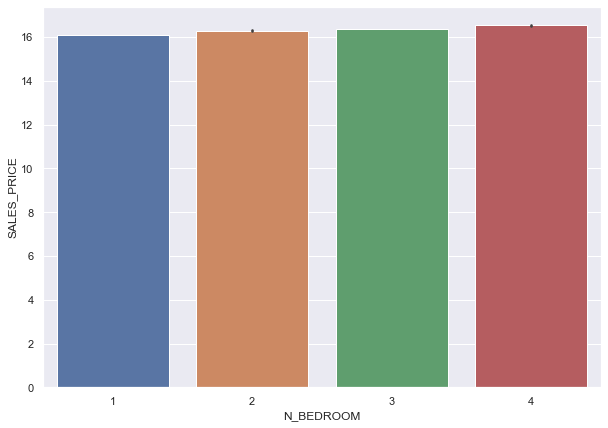

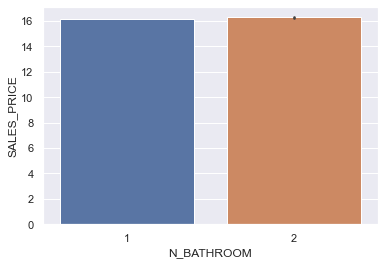

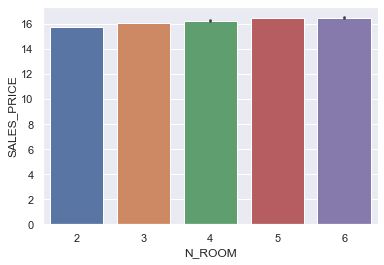

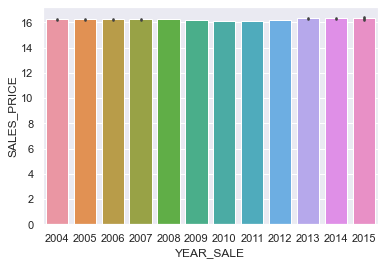

In [69]:
fig=plt.figure(figsize=(10,7))
for feature in discrete_feature:
    sns.barplot(x=feature,y='SALES_PRICE',data=data)
    plt.show()
 

#### All the features have  a nearly equal distribution.

### 3.5 Continuous_feature   plot to visualize their distributions

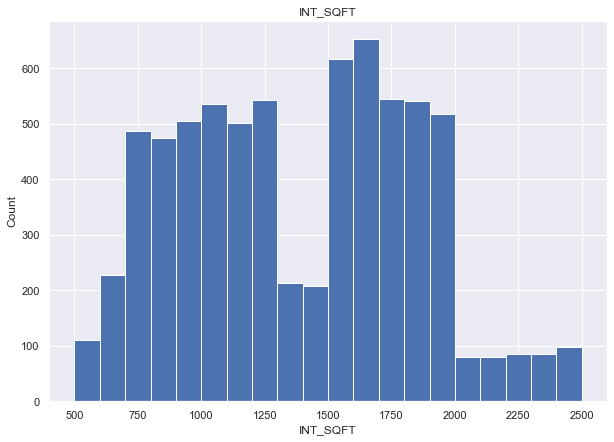

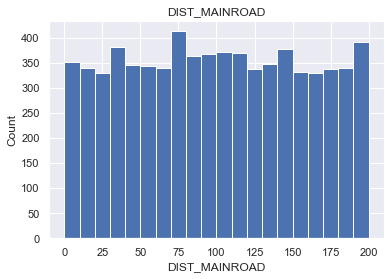

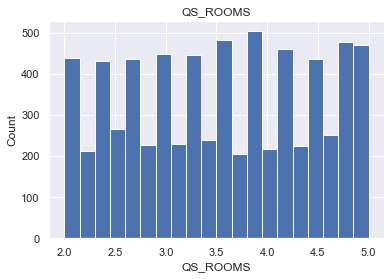

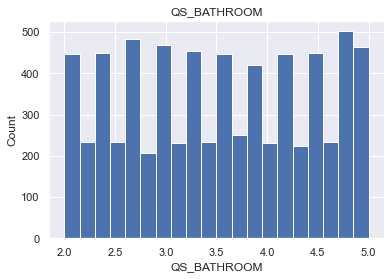

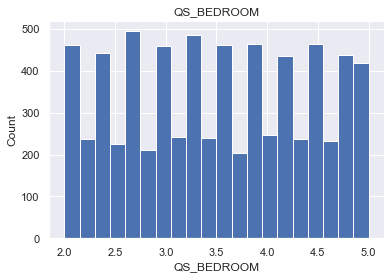

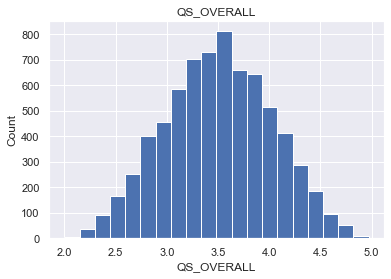

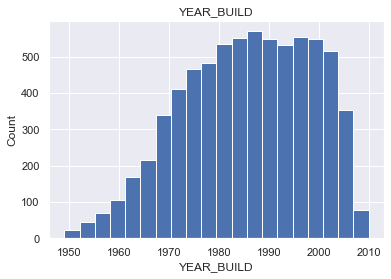

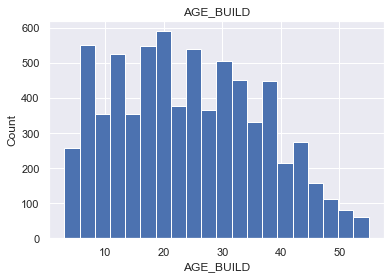

In [70]:
fig=plt.figure(figsize=(10,7))
for feature in continuous_feature:
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### 3.6 Continuous features vs salesprice  to check their linearity against the target variable

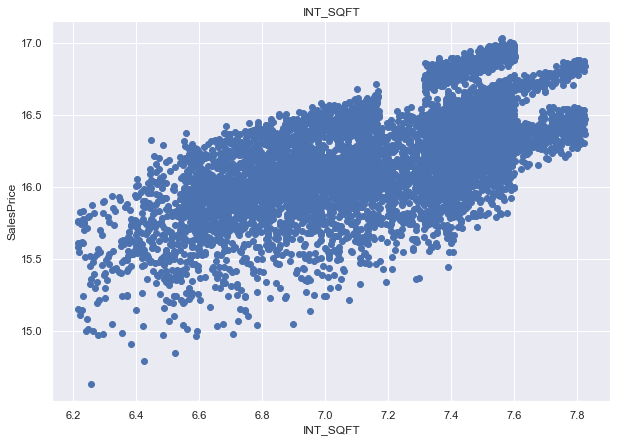

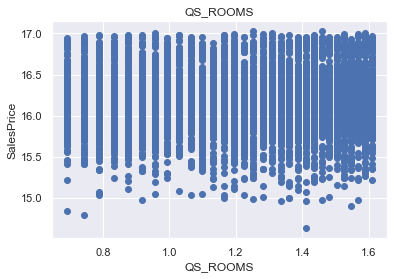

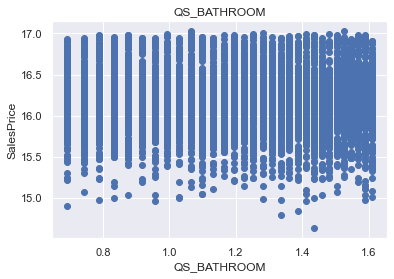

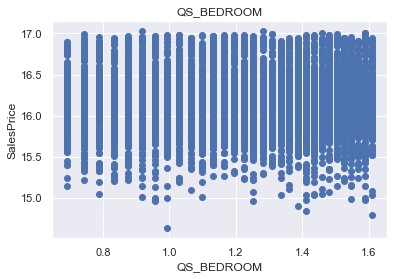

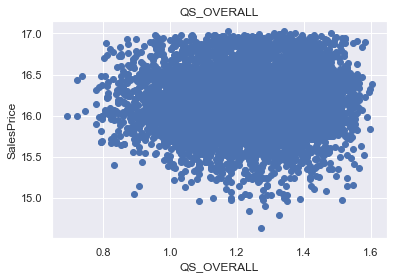

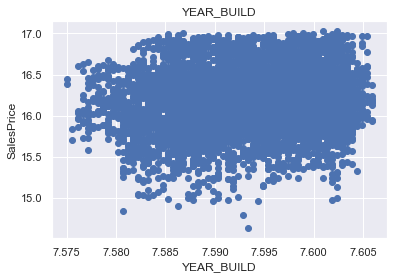

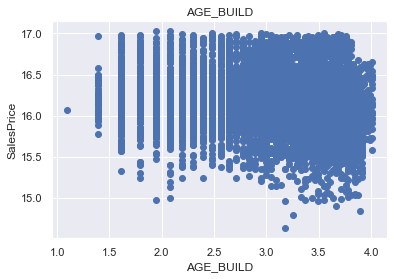

In [71]:
#plotting the log transformed features against the log transformed sales price
fig=plt.figure(figsize=(10,7))
for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        plt.scatter(dataset[feature],dataset['SALES_PRICE'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

#### In above graph i have checked whether if there is a linear relationship with target_variable('SALES_PRICE').Only "INT_SQFT" has the clear linear relation with the target_variable('SALES_PRICE'), others are morever flattened.

### 3.7 MultiVariate Analysis to get more insights on the data set

### 3.7.1  Relationship between Year of the house sold and sales price

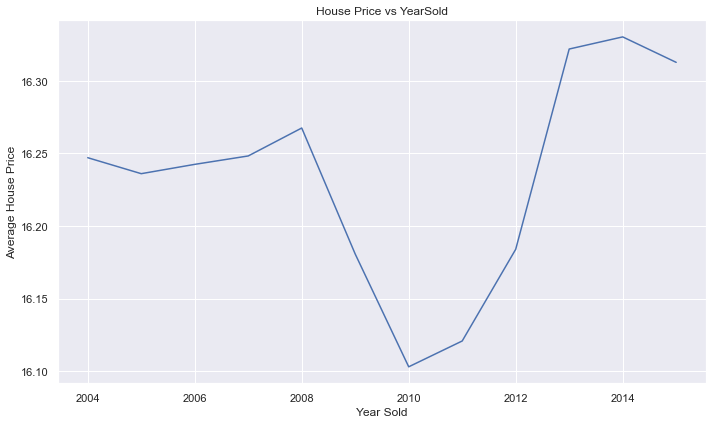

In [72]:
## We will check whether there is a relation between year the house is sold and the sales price
fig=plt.figure(figsize=(10,6))
data.groupby('YEAR_SALE')['SALES_PRICE'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Average House Price')
plt.title("House Price vs YearSold")
plt.tight_layout()

### Between Year 2008-2010 the sale price has drastically dropped.
### Graph "SALE_YEAR vs SALES_PRICE" in general we see that the price has been increased.But decreased in 2004-2005(Tsunami : "https://en.wikipedia.org/wiki/2004_Indian_Ocean_Tsunami" and decreased in 2008-2010).
### Graph "SALE_YEAR vs INF_PRICE" in general we see that the price has been decreased. But increased slightly on 2012-2013.

### 3.7.2 Relationship between Age of the buiding and sales price

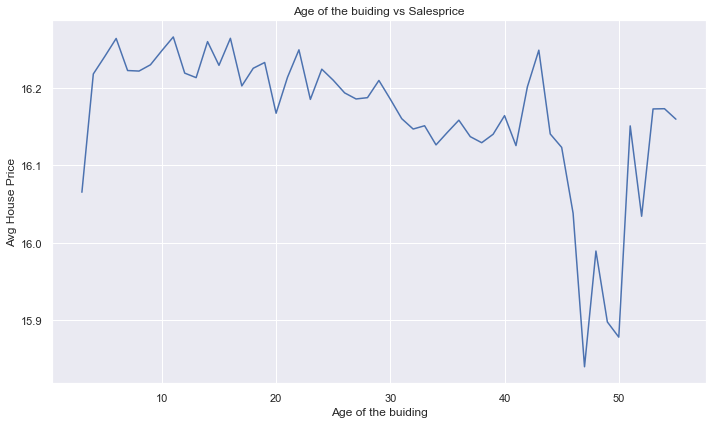

In [73]:
fig=plt.figure(figsize=(10,6))
data.groupby('AGE_BUILD')['SALES_PRICE'].mean().plot()
plt.xlabel('Age of the buiding')
plt.ylabel('Avg House Price')
plt.title("Age of the buiding vs Salesprice")
plt.tight_layout()

### The peak  sale price is  near 45 years age of building 

### 3.7.3 BUILT Type WITH AVERAGE PRICE OF EACH AREA.

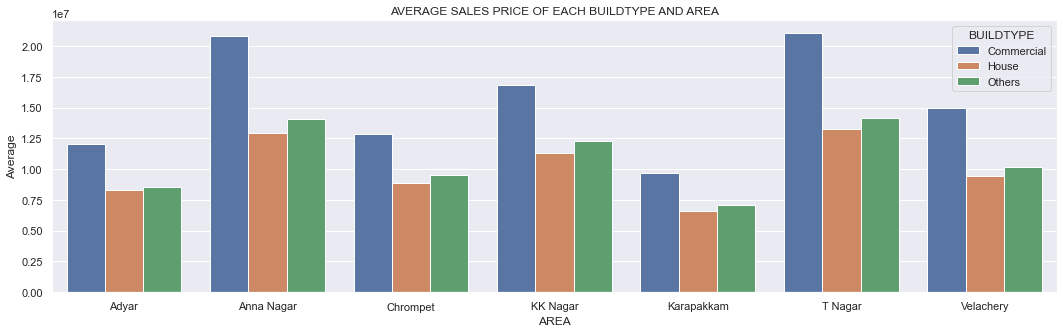

In [74]:
mean=pd.DataFrame(chennai_dataset[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())

df = mean['SALES_PRICE'].rename('Average')
df = pd.DataFrame(df)
df.reset_index(inplace=True)
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Average',data=df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()


#### COMMERCIAL - (LOW - HIGH) -
**Karapakkam area has the lowest price when compared with other area's. Followed with   Adyar , Chrompet , Velachery , KK Nagar , Anna Nagar , T Nagar  .  T Nagar  is the first highest according to the  Sales_Price.**

#### HOUSE - (LOW - HIGH) -
**Karapakam area has the lowest price when compared with other area's. Followed with   Adyar , Chrompet , Velachery , KK Nagar  Anna Nagar , T Nagar  .  T Nagar  is the first highest according to the  Sales_Price.**

#### OTHERS - (LOW - HIGH) -
**Karapakam area has the lowest price when compared with other area's. Followed with   Adyar , Chrompet , Velachery , KK Nagar , Anna Nagar , T Nagar  .T Nagar  is the first highest according to the  Sales_Price.**

**The Data Cleaning is throughly done and quite a lot of inferences are derived from EDA ,hereafter we need to perform data encoding on the categorical features**

In [75]:
numerical_features=[x for x in chennai_dataset.columns if chennai_dataset[x].dtype==np.int64 or chennai_dataset[x].dtype==np.float64]
print(numerical_features)

['INT_SQFT', 'DIST_MAINROAD', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'YEAR_SALE', 'YEAR_BUILD', 'AGE_BUILD', 'SALES_PRICE']


In [76]:
# list of categorical variables
categorical_features = [feature for feature in chennai_dataset.columns if chennai_dataset[feature].dtypes == 'O']
#print(categorical_features)
categorical_features=chennai_dataset[categorical_features]
for feature in categorical_features:
  print('The feature is {} and number of categories are  = {}'.format(feature,(chennai_dataset[feature].unique())))


The feature is AREA and number of categories are  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
The feature is SALE_COND and number of categories are  = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
The feature is PARK_FACIL and number of categories are  = ['Yes' 'No']
The feature is BUILDTYPE and number of categories are  = ['Commercial' 'Others' 'House']
The feature is UTILITY_AVAIL and number of categories are  = ['All Pub' 'ELO' 'No Sewa']
The feature is STREET and number of categories are  = ['Paved' 'Gravel' 'No Access']
The feature is MZZONE and number of categories are  = ['A' 'RH' 'RL' 'I' 'C' 'RM']


### 4. Data Encoding

### AREA,SALE_COND, PARK_FACIL,  BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE are categorical features they need to be encoded  before being fit into the model

### AREA Exhibits a linear trend with the Target Variable hence it needs to be label encoded

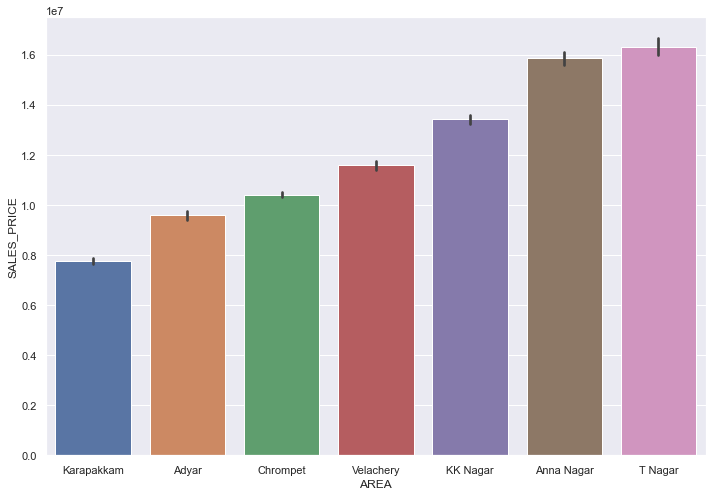

In [77]:
fig= plt.figure(figsize=(10,7))
ax=sns.barplot(x='AREA',y='SALES_PRICE',data=chennai_dataset,order=chennai_dataset.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["AREA"])
#ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

### Comparitively houses are and sold at higher rates in TNagar and Anna Nagar and least rates are at Karapakkam Area.

In [78]:
chennai_dataset['AREA']=chennai_dataset['AREA'].map({'Karapakkam':1, 'Adyar':2, 'Chrompet':3,'Velachery':4,'KK Nagar':5,
                                                     'Anna Nagar':6, 'T Nagar':7})

In [79]:
chennai_dataset['AREA'].unique()

array([1, 6, 2, 4, 3, 5, 7], dtype=int64)

### SALE_COND Exhibits a linear trend with the Target Variable hence it needs to be label encoded

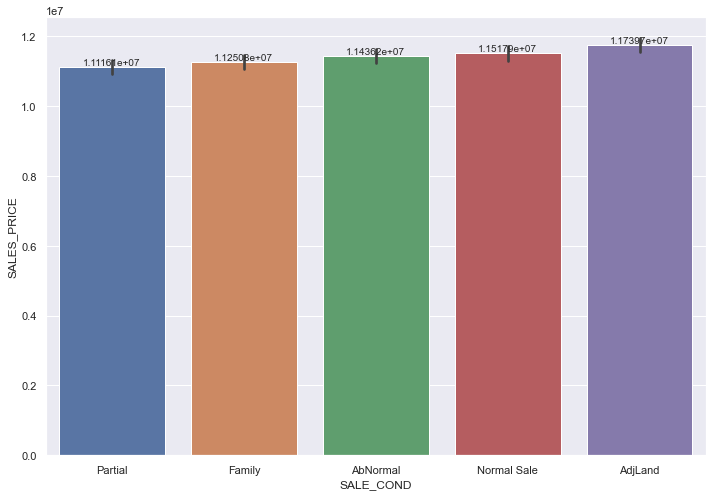

In [80]:
fig= plt.figure(figsize=(10,7))
ax=sns.barplot(x='SALE_COND',y='SALES_PRICE',data=chennai_dataset,order=chennai_dataset.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["SALE_COND"])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [81]:
chennai_dataset['SALE_COND']=chennai_dataset['SALE_COND'].map({'Partial':1, 'Family':2, 'AbNormal':3, 'Normal Sale':4,'AdjLand':5})

In [82]:
chennai_dataset['SALE_COND'].unique()

array([3, 2, 1, 5, 4], dtype=int64)

### PARK_FACIL is a binary categorical variable hence it is label encoded

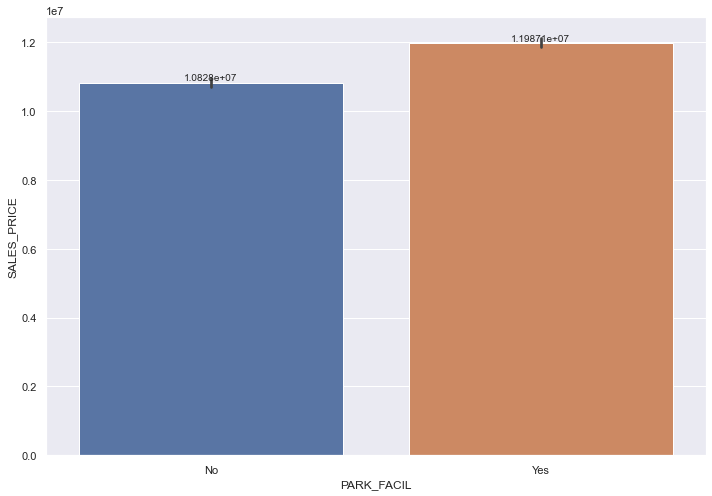

In [83]:
fig= plt.figure(figsize=(10,7))
ax=sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=chennai_dataset,order=chennai_dataset.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["PARK_FACIL"])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [84]:
chennai_dataset['PARK_FACIL']=chennai_dataset['PARK_FACIL'].map({'Yes':1, 'No':0})

In [85]:
chennai_dataset['PARK_FACIL'].unique()

array([1, 0], dtype=int64)

### BUILDTYPE does not show any linear trend with the Target Variable hence used one-hot encoding

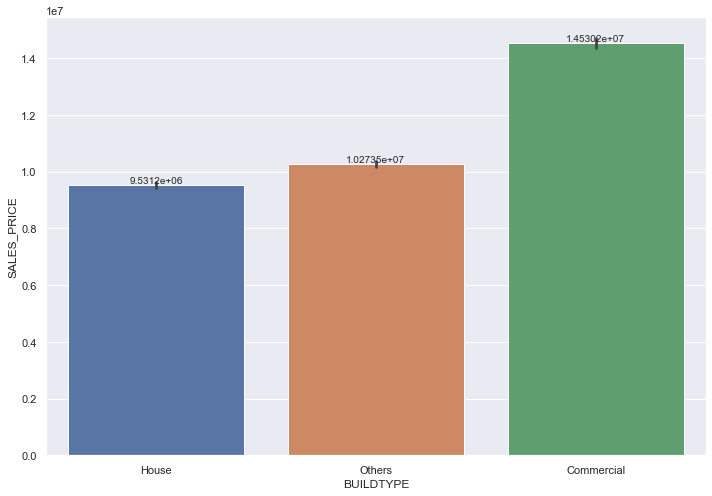

In [86]:
fig= plt.figure(figsize=(10,7))
ax=sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=chennai_dataset,order=chennai_dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["BUILDTYPE"])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [87]:
chennai_dataset=pd.get_dummies(chennai_dataset,columns=['BUILDTYPE'])

In [88]:
chennai_dataset.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,YEAR_SALE,YEAR_BUILD,AGE_BUILD,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,3,1,All Pub,Paved,A,4.0,3.9,4.9,4.330,2011,1967,44,8124400,1,0,0
1,6,1986,26,2,1,5,3,0,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,2006,1995,11,22781941,1,0,0
2,2,909,70,1,1,3,3,1,ELO,Gravel,RL,4.1,3.8,2.2,3.090,2012,1992,20,13672408,1,0,0
3,4,1855,14,3,2,5,2,0,No Sewa,Paved,I,4.7,3.9,3.6,4.010,2010,1988,22,10063653,0,0,1
4,1,1226,84,1,1,3,3,1,All Pub,Gravel,C,3.0,2.5,4.1,3.290,2009,1979,30,7717313,0,0,1


### UTILITY_AVAIL exhibits a linear trend with the Target Variable hence it needs to be label encoded

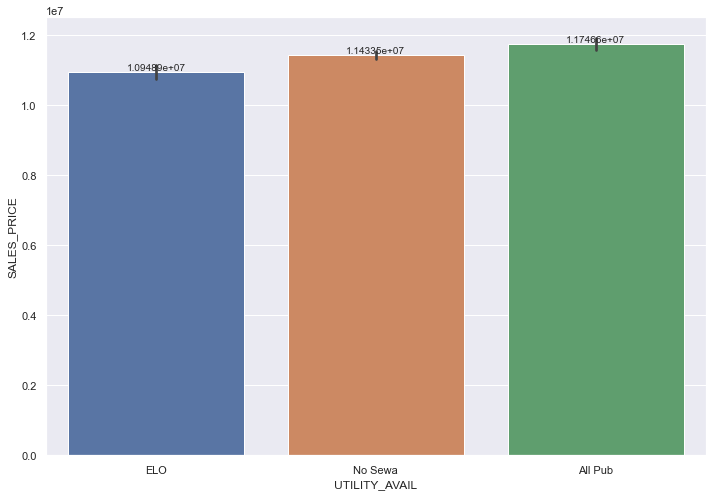

In [89]:
fig=plt.figure(figsize=(10,7))
ax=sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=chennai_dataset,order=chennai_dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [90]:
chennai_dataset['UTILITY_AVAIL']=chennai_dataset['UTILITY_AVAIL'].map({'ELO':1,'All Pub':2,'No Sewa':3})

In [91]:
chennai_dataset['UTILITY_AVAIL'].unique()

array([2, 1, 3], dtype=int64)

### STREET exhibits a linear trend with the Target Variable hence it needs to be label encoded

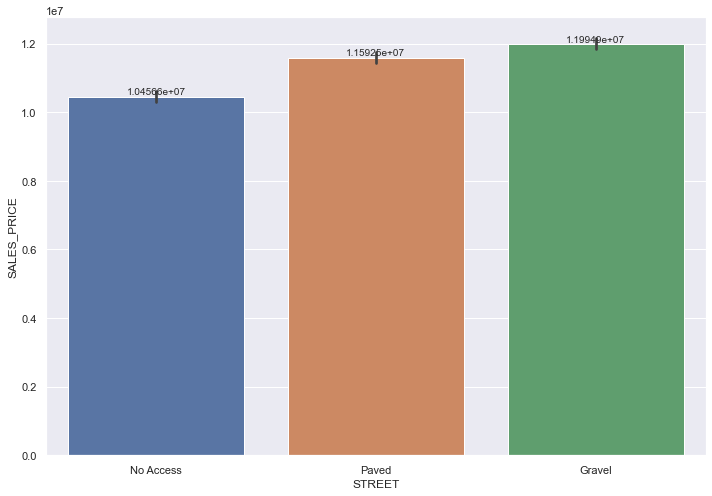

In [92]:

fig=plt.figure(figsize=(10,7))
ax=sns.barplot(x='STREET',y='SALES_PRICE',data=chennai_dataset,order=chennai_dataset.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [93]:
chennai_dataset['STREET']=chennai_dataset['STREET'].map({'No Access':1,'Paved':2, 'Gravel':3})

In [94]:
chennai_dataset['STREET'].unique()

array([2, 3, 1], dtype=int64)

### MZZONE does not show any linear trend with the Target Variable hence used one-hot encoding

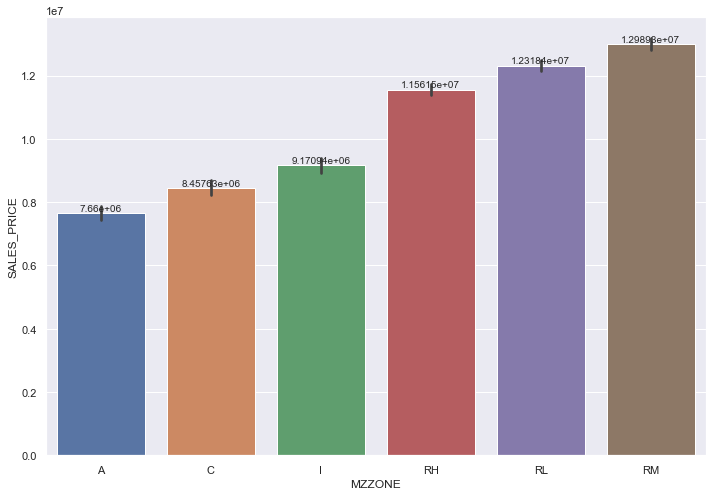

In [95]:
fig=plt.figure(figsize=(10,7))
ax=sns.barplot(x='MZZONE',y='SALES_PRICE',data=chennai_dataset,order=chennai_dataset.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

In [96]:
chennai_dataset=pd.get_dummies(chennai_dataset,columns=['MZZONE'])

In [97]:
chennai_dataset.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,YEAR_SALE,YEAR_BUILD,AGE_BUILD,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1,1004,131,1,1,3,3,1,2,2,4.0,3.9,4.9,4.330,2011,1967,44,8124400,1,0,0,1,0,0,0,0,0
1,6,1986,26,2,1,5,3,0,2,3,4.9,4.2,2.5,3.765,2006,1995,11,22781941,1,0,0,0,0,0,1,0,0
2,2,909,70,1,1,3,3,1,1,3,4.1,3.8,2.2,3.090,2012,1992,20,13672408,1,0,0,0,0,0,0,1,0
3,4,1855,14,3,2,5,2,0,3,2,4.7,3.9,3.6,4.010,2010,1988,22,10063653,0,0,1,0,0,1,0,0,0
4,1,1226,84,1,1,3,3,1,2,3,3.0,2.5,4.1,3.290,2009,1979,30,7717313,0,0,1,0,1,0,0,0,0


### Final check on missing values

In [98]:
chennai_dataset.isna().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
YEAR_SALE               0
YEAR_BUILD              0
AGE_BUILD               0
SALES_PRICE             0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
MZZONE_A                0
MZZONE_C                0
MZZONE_I                0
MZZONE_RH               0
MZZONE_RL               0
MZZONE_RM               0
dtype: int64

#### Resequencing the Sales_Price column to last for better readabilty

In [99]:
chennai_dataset=chennai_dataset[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM', 'YEAR_SALE', 'YEAR_BUILD', 'AGE_BUILD','SALES_PRICE']]

In [100]:
chennai_dataset.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,YEAR_SALE,YEAR_BUILD,AGE_BUILD,SALES_PRICE
0,1,1004,131,1,1,3,3,1,2,2,4.0,3.9,4.9,4.330,1,0,0,1,0,0,0,0,0,2011,1967,44,8124400
1,6,1986,26,2,1,5,3,0,2,3,4.9,4.2,2.5,3.765,1,0,0,0,0,0,1,0,0,2006,1995,11,22781941
2,2,909,70,1,1,3,3,1,1,3,4.1,3.8,2.2,3.090,1,0,0,0,0,0,0,1,0,2012,1992,20,13672408
3,4,1855,14,3,2,5,2,0,3,2,4.7,3.9,3.6,4.010,0,0,1,0,0,1,0,0,0,2010,1988,22,10063653
4,1,1226,84,1,1,3,3,1,2,3,3.0,2.5,4.1,3.290,0,0,1,0,1,0,0,0,0,2009,1979,30,7717313


**The dataset is throughly cleaned,encoded and extra features that help us derive business value in this problem have been added**

In [101]:
chennai_dataset1=chennai_dataset.copy()
##YEAR_SALE does not have much relationship with target hence dropping the column
chennai_dataset1.drop('YEAR_SALE',axis=1,inplace=True)

In [102]:
chennai_dataset1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,YEAR_BUILD,AGE_BUILD,SALES_PRICE
0,1,1004,131,1,1,3,3,1,2,2,4.0,3.9,4.9,4.330,1,0,0,1,0,0,0,0,0,1967,44,8124400
1,6,1986,26,2,1,5,3,0,2,3,4.9,4.2,2.5,3.765,1,0,0,0,0,0,1,0,0,1995,11,22781941
2,2,909,70,1,1,3,3,1,1,3,4.1,3.8,2.2,3.090,1,0,0,0,0,0,0,1,0,1992,20,13672408
3,4,1855,14,3,2,5,2,0,3,2,4.7,3.9,3.6,4.010,0,0,1,0,0,1,0,0,0,1988,22,10063653
4,1,1226,84,1,1,3,3,1,2,3,3.0,2.5,4.1,3.290,0,0,1,0,1,0,0,0,0,1979,30,7717313


### 5. FEATURE SPLITTING AND SCALING


### 5.1 Feature selection

In [103]:
# Input Data
X = chennai_dataset1.drop('SALES_PRICE',axis=1)

# Output Data (Target) Normalized /Log transformed sales Price
Y = data['SALES_PRICE']


from sklearn.feature_selection import VarianceThreshold
var_Thres=VarianceThreshold(threshold=1)
var_Thres.fit(X)

VarianceThreshold(threshold=1)

In [104]:
var_Thres.get_support()

array([ True,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [105]:
X.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM', 'YEAR_BUILD', 'AGE_BUILD'], dtype='object')

In [106]:
X.columns[var_Thres.get_support()]

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_ROOM', 'SALE_COND', 'YEAR_BUILD', 'AGE_BUILD'], dtype='object')

In [107]:
#Few other features which are interpreted to be salient from the ground work
X=X[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'YEAR_BUILD', 'AGE_BUILD','PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM']]




### 5.2 Feature splitting

In [108]:

# splitting data to training and testing dataset.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,random_state = 1)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)
XT = X_test.copy()

xtrain shape :  (5687, 21)
xtest shape :  (1422, 21)
ytrain shape :  (5687,)
ytest shape :  (1422,)


In [109]:
X_train.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,YEAR_BUILD,AGE_BUILD,PARK_FACIL,UTILITY_AVAIL,STREET,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
4469,3,1155,158,1,1,3,5,1976,35,1,3,3,0,1,0,0,0,0,1,0,0
4722,6,1785,148,1,1,4,1,1970,38,1,3,3,0,1,0,0,0,0,1,0,0
6878,1,585,37,1,1,2,5,1994,17,1,3,1,0,0,1,0,1,0,0,0,0
3822,5,2050,191,3,2,5,2,1997,13,1,3,3,1,0,0,0,0,0,1,0,0
5779,5,1503,121,2,1,4,1,1998,11,1,3,3,0,1,0,0,0,0,0,0,1


### 5.2  Standardization /Scaling the data

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit will learn the values of mu and sigma while transform will transform the data from X to (X-mu)/sigma
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

### 6. MACHINE LEARNING MODEL:
#### Will try all the regression model and use which will give me the highest score in my cross_validation/test data.

#### Importing the required packages to build the models

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import xgboost as xg
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### WITH CROSS VALIDATION.

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
import xgboost as xg
xg_model = xg.XGBRegressor()
'''xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) '''
rf = RandomForestRegressor()
knn= KNeighborsRegressor()
DT=DecisionTreeRegressor()

In [114]:
CV_Linear_regression = cross_val_score(lr_model,X_train,Y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.9422351161352338


In [115]:
CV_XG_Boost = cross_val_score(xg_model,X_train,Y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)


The cross_validation score of an XG_Boost model is: 0.9939344620988813


In [116]:
CV_RandomForest = cross_val_score(rf,X_train,Y_train,cv=10).mean()
print("The cross_validation score of an RandomForest model is:",CV_RandomForest)


The cross_validation score of an RandomForest model is: 0.9802248338226628


In [117]:
CV_KNNRegressor = cross_val_score(knn,X_train,Y_train,cv=10).mean()
print("The cross_validation score of an KNeighborsRegressor model is:",CV_KNNRegressor)

The cross_validation score of an KNeighborsRegressor model is: 0.8920492375588649


In [118]:

CV_DecisionTreeReg = cross_val_score(DT,X_train,Y_train,cv=10).mean()
print("The cross_validation score of an DecisionTreeRegressor model is:",CV_DecisionTreeReg)

The cross_validation score of an DecisionTreeRegressor model is: 0.9514646417060091


#### R_SQUARED_SCORES
**The cross_validation score of an Linear_Regression model is: 0.9423153795209755**

**The cross_validation score of an XG_Boost model is: 0.9932868435504195**

**The cross_validation score of an RandomForest model is: 0.980279990952478**

**The cross_validation score of an KNeighborsRegressor model is: 0.8920492375588649**

**The cross_validation score of an DecisionTreeRegressor model is: 0.952225589202682**

### WITHOUT CROSS_VALIDATION

### 6.1 Linear regression model fitting

In [119]:
LR_model=LinearRegression()
LR_model.fit(X_train,Y_train)

LinearRegression()

In [120]:
# predicting the test set results
LR_Ypred = LR_model.predict(X_test)

In [121]:
coefficients_linear = pd.DataFrame(LR_model.coef_,X.columns)
coefficients_linear.columns = ['coefficients_linear']
coefficients_linear

,coefficients_linear
AREA,0.081923
INT_SQFT,0.061105
DIST_MAINROAD,0.000026
N_BEDROOM,-0.121056
N_BATHROOM,0.014270
N_ROOM,0.179129
SALE_COND,0.021419
YEAR_BUILD,-0.050752
AGE_BUILD,-0.074983
PARK_FACIL,0.052436


In [122]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': LR_Ypred})
df

,Actual,Predicted
5492,16.802372,16.745934
3039,15.822955,15.834865
2252,15.881160,15.774976
2488,16.517392,16.550411
4146,15.742054,15.696587
...,...,...
4994,16.080825,16.053616
5874,16.670309,16.672071
2011,15.741699,15.750571
1380,16.087357,16.010188


### 6.1.1  Plot of True  value vs Predicted value

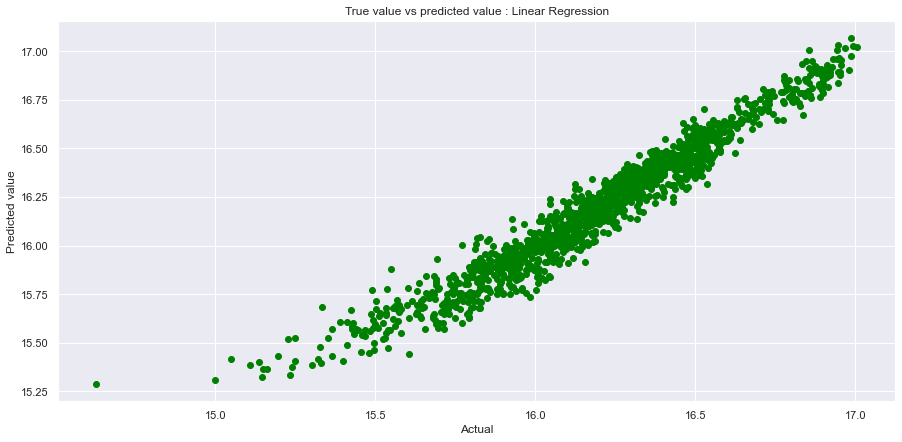

In [123]:
#Plotting Scatter graph to show the prediction
fig=plt.figure(figsize=(15,7))
plt.scatter(Y_test, LR_Ypred, c = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

### There is a considerably Linear trend.

### 6.1.2  Linear Model Evaluation

In [124]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, LR_Ypred))
print('Mean Squared Error:', mean_squared_error(Y_test, LR_Ypred))
print('R2- SCORE:', r2_score(Y_test,LR_Ypred))


Mean Absolute Error: 0.06273720438981542
Mean Squared Error: 0.006839935101985581
R2- SCORE: 0.9451321434632391


### 6.2 XG Boost Regressor fitting

In [125]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
  model = xg.XGBRegressor(learning_rate = lr, n_estimators=100) # initialise the model
  model.fit(X_train,Y_train) #train the model
  model.score(X_test, Y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))

Learning rate :  0.01  Train score :  -271.06441966396767  Cross-Val score :  -272.1408148264079
Learning rate :  0.02  Train score :  -34.93685741094644  Cross-Val score :  -35.09163390870175
Learning rate :  0.03  Train score :  -3.7039028503099187  Cross-Val score :  -3.7331063312219412
Learning rate :  0.04  Train score :  0.3736287460926956  Cross-Val score :  0.3641617254866495
Learning rate :  0.05  Train score :  0.9062459421028306  Cross-Val score :  0.8998354566283163
Learning rate :  0.1  Train score :  0.9974920929536584  Cross-Val score :  0.9940188833316597
Learning rate :  0.11  Train score :  0.9979427519856804  Cross-Val score :  0.9946622938042238
Learning rate :  0.12  Train score :  0.9981207034302764  Cross-Val score :  0.9949643835889074
Learning rate :  0.13  Train score :  0.9983608361122301  Cross-Val score :  0.995035811360492
Learning rate :  0.14  Train score :  0.9985176053516674  Cross-Val score :  0.9951972617743341
Learning rate :  0.15  Train score :  0

### Learning rate of 0.15 it has highest validation score 0.9951061 it is the best hyperparam for the model

In [126]:
model1 = xg.XGBRegressor(learning_rate = 0.15, n_estimators=100) # initialise the model
model1.fit(X_train,Y_train) #train the model
model1.score(X_test, Y_test) # scoring the model - r2 squared
print("Learning rate : ", 0.15, " Train score : ", model1.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model1, X_train, Y_train, cv=10)))

Learning rate :  0.15  Train score :  0.9986851874078128  Cross-Val score :  0.9952832328594516


#### Learning rate :  **0.15**  
#### Train score :  **0.99887**
#### Cross-Val score :  **0.995106**

In [127]:
Y_pred=model1.predict(X_test)
Y_pred

array([16.792824, 15.83518 , 15.895152, ..., 15.762422, 16.07351 ,
       16.084969], dtype=float32)

### 6.2.1 Evaluation of XG boost Model

In [128]:

print('Mean Absolute Error:',mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:',mean_squared_error(Y_test, Y_pred))
print('R2- SCORE:', r2_score(Y_test,Y_pred))

Mean Absolute Error: 0.017444345556183703
Mean Squared Error: 0.0005367429544443762
R2- SCORE: 0.9956944130342666


### 6.2.2 Plotting Scatter plot to visualize  the predicted value vs True Value

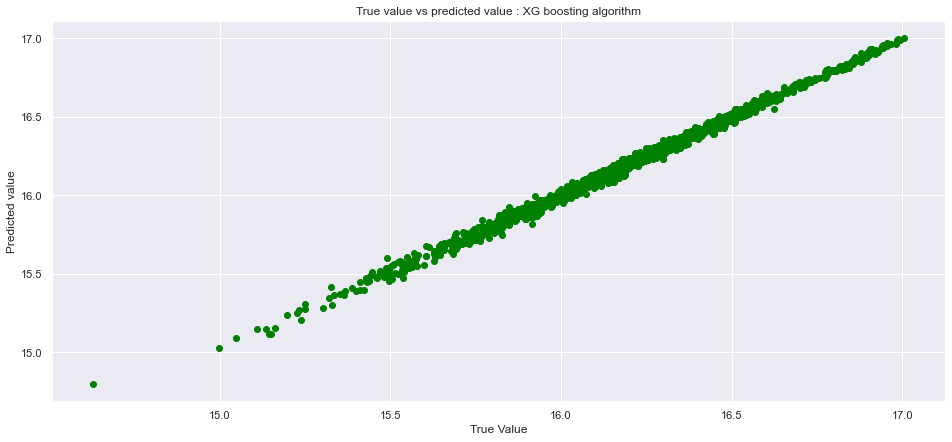

In [129]:
fig=plt.figure(figsize=(16,7))
plt.scatter(Y_test, Y_pred, c = 'green')
plt.xlabel("True Value")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : XG boosting algorithm")
plt.show()

### There is a good linear relationship the model predict 99% accurately

In [130]:
df_XGB = pd.DataFrame({'Actual_price': Y_test, 'Predicted_price': Y_pred})
df_XGB.head()

,Actual_price,Predicted_price
5492,16.802372,16.792824
3039,15.822955,15.835180
2252,15.881160,15.895152
2488,16.517392,16.498079
4146,15.742054,15.751313


### 6.2  Random Forest model fitting

[0.9770478403671228,
 0.980326411584761,
 0.9791126216435535,
 0.9805942522109645,
 0.9807312101979618,
 0.9807600688489239,
 0.9810496247689474,
 0.981063188843774,
 0.981415845408912,
 0.9814091510430395,
 0.9810344224489034,
 0.9813626432488489,
 0.981620592831663,
 0.9811637788480014,
 0.9810872626623868,
 0.9807747624218545,
 0.9812939130920371,
 0.9813692484368378,
 0.9816116580122992]

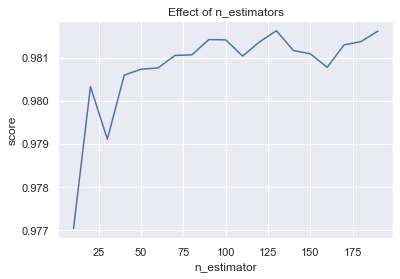

In [131]:
# Try different numbers of n_estimators
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
scores

In [132]:
model = RandomForestRegressor(n_estimators= 40, max_depth = 4, max_features='sqrt')
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=40)

In [133]:
c=model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(Y_test, c))
print('Mean Squared Error:', mean_squared_error(Y_test, c))
print('R2- SCORE:', r2_score(Y_test,c))

Mean Absolute Error: 0.12532173644113154
Mean Squared Error: 0.026328813534010214
R2- SCORE: 0.7887983522902373


### 5.6 Decision Tree model fitting


In [134]:
model3=DecisionTreeRegressor()

In [135]:
model3.fit(X_train,Y_train)
a = model3.predict(X_test)
                   

In [136]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, a))
print('Mean Squared Error:', mean_squared_error(Y_test, a))
print('R2- SCORE:', r2_score(Y_test,a))

Mean Absolute Error: 0.05318373245389533
Mean Squared Error: 0.005316503278959671
R2- SCORE: 0.9573526451877449


### 5.7  KNN model fitting

In [137]:
clf = KNeighborsRegressor()
clf.fit(X_train, Y_train)
b= clf.predict(X_test)

In [138]:
b= clf.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(Y_test, b))
print('Mean Squared Error:', mean_squared_error(Y_test, b))
print('R2- SCORE:', r2_score(Y_test,b))

Mean Absolute Error: 0.08281618868455784
Mean Squared Error: 0.012421118937548156
R2- SCORE: 0.9003616025985985


### 5.8 ENSEMBLE TECHNIQUE

In [139]:
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = DecisionTreeRegressor(random_state=1)

# # we need to give the list of models that we are trying to combine

model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Decision_Tree',model3)])
model.fit(X_train,Y_train)# Train all of the models on the training data
et_y_pred=model.predict(X_test)#prediction on test data
print("Ensemble Technique Rsquared metric",r2_score(Y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.9808464688075417


#### R_SQUARED_SCORES.
#### score of an Linear_Regression model is : 0.9454442295116082
#### score of an XG_Boost model is : 0.9991105715153005
#### score of an Random_Forest model is :  0.782951355974158
#### score of KNN Regression Model is 0.8810484224324268
#### score of an Ensemble_technic model is : 0.9776864523917477

## BEST MODEL:
### XGBoost model give  the highest score which is close to 1 over the other models hence choosing that as the final model

### Predictions

In [140]:
df_XGB.head()


,Actual_price,Predicted_price
5492,16.802372,16.792824
3039,15.822955,15.835180
2252,15.881160,15.895152
2488,16.517392,16.498079
4146,15.742054,15.751313


In [141]:
XT.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,YEAR_BUILD,AGE_BUILD,PARK_FACIL,UTILITY_AVAIL,STREET,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
5492,5,2364,140,4,2,6,2,1989,22,0,2,2,1,0,0,0,0,0,0,0,1
3039,1,1124,112,1,1,3,2,1965,46,0,3,2,0,1,0,0,0,0,0,0,1
2252,3,738,76,1,1,2,5,1977,32,1,2,2,0,1,0,0,0,0,1,0,0
2488,5,2415,128,4,2,6,2,2000,10,1,3,3,0,0,1,0,0,0,0,1,0
4146,1,785,173,1,1,2,5,1990,22,1,2,2,0,0,1,0,0,1,0,0,0


In [142]:
df_XGB["YEAR_SALE"]=XT['YEAR_BUILD']+XT["AGE_BUILD"]
df_XGB.head()

,Actual_price,Predicted_price,YEAR_SALE
5492,16.802372,16.792824,2011
3039,15.822955,15.835180,2011
2252,15.881160,15.895152,2009
2488,16.517392,16.498079,2010
4146,15.742054,15.751313,2012


In [143]:
from datetime import date
df_XGB["YEARS_PASSED"]=(date.today().year)-df_XGB["YEAR_SALE"]
df_XGB.head()

,Actual_price,Predicted_price,YEAR_SALE,YEARS_PASSED
5492,16.802372,16.792824,2011,11
3039,15.822955,15.835180,2011,11
2252,15.881160,15.895152,2009,13
2488,16.517392,16.498079,2010,12
4146,15.742054,15.751313,2012,10


### Since the Sales Price was log transformed applying antilog to acquire the actual sales price

In [144]:
df_XGB["Predicted_price"]=np.exp(df_XGB["Predicted_price"].values)
df_XGB["Actual_price"]=np.exp(df_XGB["Actual_price"].values)
df_XGB.head()

,Actual_price,Predicted_price,YEAR_SALE,YEARS_PASSED
5492,19823365.0,19634992.0,2011,11
3039,7444272.0,7535835.5,2011,11
2252,7890418.0,8001600.0,2009,13
2488,14907750.0,14622607.0,2010,12
4146,6865736.0,6929604.0,2012,10


### Taking  Inflation into account while predicting the sales price

#### What is inflation? 
URL: https://en.wikipedia.org/wiki/Inflation_in_India

Because of the rate of inflation here we need to adjust the sales price for today rate Notably, the RBI had projected CPI inflation at 5.3 percent for fiscal year 2021-22. This includes a projection of 5.1 percent in the second quarter, **4.5 percent** in third,**5.8 percent** in the last quarter of the fiscal, with risks broadly balanced.

Assume 5% rate of inflation and get the value of today price:

### Price today=Price historical*(1+ rate of inflation)^( no of years passed)

In [145]:
df_XGB["Today_price"]=(df_XGB["Predicted_price"])*((1+0.05)**(df_XGB["YEARS_PASSED"]))
df_XGB["Today_price"]=df_XGB["Today_price"].astype(int)
df_XGB.head()

,Actual_price,Predicted_price,YEAR_SALE,YEARS_PASSED,Today_price
5492,19823365.0,19634992.0,2011,11,33582499
3039,7444272.0,7535835.5,2011,11,12888836
2252,7890418.0,8001600.0,2009,13,15088210
2488,14907750.0,14622607.0,2010,12,26260101
4146,6865736.0,6929604.0,2012,10,11287594


In [146]:
XT.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,YEAR_BUILD,AGE_BUILD,PARK_FACIL,UTILITY_AVAIL,STREET,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
5492,5,2364,140,4,2,6,2,1989,22,0,2,2,1,0,0,0,0,0,0,0,1
3039,1,1124,112,1,1,3,2,1965,46,0,3,2,0,1,0,0,0,0,0,0,1
2252,3,738,76,1,1,2,5,1977,32,1,2,2,0,1,0,0,0,0,1,0,0
2488,5,2415,128,4,2,6,2,2000,10,1,3,3,0,0,1,0,0,0,0,1,0
4146,1,785,173,1,1,2,5,1990,22,1,2,2,0,0,1,0,0,1,0,0,0


In [147]:
df_XGB1=XT.merge(df_XGB, left_index=True, right_index=True, suffixes=(False, False))
df_XGB1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,YEAR_BUILD,AGE_BUILD,PARK_FACIL,UTILITY_AVAIL,STREET,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,Actual_price,Predicted_price,YEAR_SALE,YEARS_PASSED,Today_price
5492,5,2364,140,4,2,6,2,1989,22,0,2,2,1,0,0,0,0,0,0,0,1,19823365.0,19634992.0,2011,11,33582499
3039,1,1124,112,1,1,3,2,1965,46,0,3,2,0,1,0,0,0,0,0,0,1,7444272.0,7535835.5,2011,11,12888836
2252,3,738,76,1,1,2,5,1977,32,1,2,2,0,1,0,0,0,0,1,0,0,7890418.0,8001600.0,2009,13,15088210
2488,5,2415,128,4,2,6,2,2000,10,1,3,3,0,0,1,0,0,0,0,1,0,14907750.0,14622607.0,2010,12,26260101
4146,1,785,173,1,1,2,5,1990,22,1,2,2,0,0,1,0,0,1,0,0,0,6865736.0,6929604.0,2012,10,11287594


In [148]:
dfxg1=df_XGB1.groupby('AREA')['Predicted_price'].transform('std').astype(int)

dfxg1

5492    3040158
3039    2257708
2252    2372312
2488    3040158
4146    2257708
         ...   
4994    2806737
5874    3707856
2011    2257708
1380    2372312
3906    3040158
Name: Predicted_price, Length: 1422, dtype: int32

In [149]:
## Imputing a column for Price Range 
std_dev=df_XGB1.groupby('AREA')['Predicted_price'].transform('std').astype(int)
min_range=abs(df_XGB1['Predicted_price']-std_dev).astype('str')
max_range=(df_XGB1['Predicted_price']+std_dev).astype('str')
df_XGB1['Predicted_price_Range']=min_range +' to '+max_range
df_XGB1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,YEAR_BUILD,AGE_BUILD,PARK_FACIL,UTILITY_AVAIL,STREET,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,Actual_price,Predicted_price,YEAR_SALE,YEARS_PASSED,Today_price,Predicted_price_Range
5492,5,2364,140,4,2,6,2,1989,22,0,2,2,1,0,0,0,0,0,0,0,1,19823365.0,19634992.0,2011,11,33582499,16594834.0 to 22675150.0
3039,1,1124,112,1,1,3,2,1965,46,0,3,2,0,1,0,0,0,0,0,0,1,7444272.0,7535835.5,2011,11,12888836,5278127.5 to 9793543.5
2252,3,738,76,1,1,2,5,1977,32,1,2,2,0,1,0,0,0,0,1,0,0,7890418.0,8001600.0,2009,13,15088210,5629288.0 to 10373912.0
2488,5,2415,128,4,2,6,2,2000,10,1,3,3,0,0,1,0,0,0,0,1,0,14907750.0,14622607.0,2010,12,26260101,11582449.0 to 17662765.0
4146,1,785,173,1,1,2,5,1990,22,1,2,2,0,0,1,0,0,1,0,0,0,6865736.0,6929604.0,2012,10,11287594,4671896.0 to 9187312.0


In [150]:
df_XGB1.sort_values('Predicted_price').head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,YEAR_BUILD,AGE_BUILD,PARK_FACIL,UTILITY_AVAIL,STREET,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM,Actual_price,Predicted_price,YEAR_SALE,YEARS_PASSED,Today_price,Predicted_price_Range
3385,1,521,51,1,1,2,1,1985,24,0,1,1,0,0,1,1,0,0,0,0,0,2253935.0,2670584.00,2009,13,5035784,412876.0 to 4928292.0
3990,1,731,46,1,1,2,3,1979,31,0,1,2,0,1,0,1,0,0,0,0,0,3263830.0,3367577.25,2010,12,6047684,1109869.25 to 5625285.25
2589,1,991,189,1,1,3,1,1979,33,0,3,1,0,1,0,1,0,0,0,0,0,3430234.0,3575313.25,2012,10,5823808,1317605.25 to 5833021.25
45,1,851,105,1,1,2,1,1982,29,0,2,1,0,1,0,0,1,0,0,0,0,3779441.0,3662568.00,2011,11,6264234,1404860.0 to 5920276.0
3660,1,836,66,1,1,2,4,1988,22,0,3,1,0,0,1,1,0,0,0,0,0,3795197.0,3665094.25,2010,12,6581982,1407386.25 to 5922802.25


### Decode Columns

In [151]:

df_XGB2=df_XGB1.copy()
df_XGB2['AREA']= df_XGB2['AREA'].replace({1:'Karapakkam', 2:'Adyar', 3:'Chrompet',4:'Velachery',5:'KK Nagar',6:'Anna Nagar',7:'T Nagar'})
df_XGB2['BUILDTYPE'] = df_XGB2[['BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others']].apply(lambda x: x.idxmax(), axis = 1)
df_XGB2['BUILDTYPE'] =df_XGB2['BUILDTYPE'] .replace({'BUILDTYPE_Commercial':'Commercial',  'BUILDTYPE_House':'House','BUILDTYPE_Others':'Others'})
df_XGB2.drop(['BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others'],axis=1,inplace=True)
df_XGB2['SALE_COND']=df_XGB2['SALE_COND'].map({1:'Partial', 2:'Family', 3:'AbNormal', 4:'Normal Sale',5:'AdjLand'})
df_XGB2['PARK_FACIL']=df_XGB2['PARK_FACIL'].map({1:'Yes', 0:'No'})
df_XGB2['UTILITY_AVAIL']=df_XGB2['UTILITY_AVAIL'].map({1:'ELO',2:'All Pub',3:'No Sewa'})
df_XGB2['STREET']=df_XGB2['STREET'].map({1:'No Access',2:'Paved', 3:'Gravel'})
df_XGB2['MZZONE']=df_XGB2[['MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM']].apply(lambda x: x.idxmax(), axis = 1)
df_XGB2['MZZONE']=df_XGB2['MZZONE'].replace({'MZZONE_A':'A', 'MZZONE_C':'C', 'MZZONE_I':'I', 'MZZONE_RH':'RH', 'MZZONE_RL':'RL', 'MZZONE_RM':'RM'})
df_XGB2.drop(['MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],axis=1,inplace=True)
df_XGB2=df_XGB2[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'BUILDTYPE', 'MZZONE', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'YEAR_BUILD', 'AGE_BUILD', 'YEAR_SALE', 'YEARS_PASSED', 'Actual_price', 'Predicted_price', 'Today_price', 'Predicted_price_Range']]

In [152]:
df_XGB2.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,BUILDTYPE,MZZONE,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,YEAR_BUILD,AGE_BUILD,YEAR_SALE,YEARS_PASSED,Actual_price,Predicted_price,Today_price,Predicted_price_Range
5492,KK Nagar,2364,140,4,2,6,Commercial,RM,Family,No,All Pub,Paved,1989,22,2011,11,19823365.0,19634992.0,33582499,16594834.0 to 22675150.0
3039,Karapakkam,1124,112,1,1,3,House,RM,Family,No,No Sewa,Paved,1965,46,2011,11,7444272.0,7535835.5,12888836,5278127.5 to 9793543.5
2252,Chrompet,738,76,1,1,2,House,RH,AdjLand,Yes,All Pub,Paved,1977,32,2009,13,7890418.0,8001600.0,15088210,5629288.0 to 10373912.0
2488,KK Nagar,2415,128,4,2,6,Others,RL,Family,Yes,No Sewa,Gravel,2000,10,2010,12,14907750.0,14622607.0,26260101,11582449.0 to 17662765.0
4146,Karapakkam,785,173,1,1,2,Others,I,AdjLand,Yes,All Pub,Paved,1990,22,2012,10,6865736.0,6929604.0,11287594,4671896.0 to 9187312.0


In [153]:
## Save the predictions into a CSV file
df_XGB2.to_csv('XGBPrediction.csv')

In [154]:
df_XGB2.sort_values('Predicted_price')

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,BUILDTYPE,MZZONE,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,YEAR_BUILD,AGE_BUILD,YEAR_SALE,YEARS_PASSED,Actual_price,Predicted_price,Today_price,Predicted_price_Range
3385,Karapakkam,521,51,1,1,2,Others,A,Partial,No,ELO,No Access,1985,24,2009,13,2253935.0,2670584.00,5035784,412876.0 to 4928292.0
3990,Karapakkam,731,46,1,1,2,House,A,AbNormal,No,ELO,Paved,1979,31,2010,12,3263830.0,3367577.25,6047684,1109869.25 to 5625285.25
2589,Karapakkam,991,189,1,1,3,House,A,Partial,No,No Sewa,No Access,1979,33,2012,10,3430234.0,3575313.25,5823808,1317605.25 to 5833021.25
45,Karapakkam,851,105,1,1,2,House,C,Partial,No,All Pub,No Access,1982,29,2011,11,3779441.0,3662568.00,6264234,1404860.0 to 5920276.0
3660,Karapakkam,836,66,1,1,2,Others,A,Normal Sale,No,No Sewa,No Access,1988,22,2010,12,3795197.0,3665094.25,6581982,1407386.25 to 5922802.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,T Nagar,1955,137,2,1,5,Commercial,RL,Partial,Yes,All Pub,Gravel,1976,36,2012,10,23127868.0,23372342.00,38071082,19664486.0 to 27080198.0
7076,T Nagar,1921,188,2,1,5,Commercial,RM,Family,Yes,No Sewa,Gravel,1998,15,2013,9,23980067.0,23910268.00,37092673,20202412.0 to 27618124.0
2927,Anna Nagar,1943,171,2,1,5,Commercial,RM,AbNormal,Yes,ELO,Gravel,1979,33,2012,10,23803439.0,23928106.00,38976363,20202212.0 to 27654000.0
5234,T Nagar,1881,14,2,1,5,Commercial,RM,Normal Sale,Yes,ELO,Gravel,1990,19,2009,13,23843333.0,24073726.00,45394600,20365870.0 to 27781582.0


### Sale Predictor  Function Based on User Input

In [155]:
def saleprice_predictor(df,area='Karapakkam',BUILDTYPE='Commercial',PARK_FACIL='Yes',
                        UTILITY_AVAIL='All Pub'):
    df_property = df[(df.BUILDTYPE==BUILDTYPE) & (df.AREA==area) & (df.PARK_FACIL==PARK_FACIL) & (df.UTILITY_AVAIL==UTILITY_AVAIL) ]
    #df_property = df[(df.BUILDTYPE==BUILDTYPE) & (df.AREA==area)]
    return df_property

In [156]:
df1=saleprice_predictor(df_XGB2,area='T Nagar')
df1.sort_values('Predicted_price')

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,BUILDTYPE,MZZONE,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,YEAR_BUILD,AGE_BUILD,YEAR_SALE,YEARS_PASSED,Actual_price,Predicted_price,Today_price,Predicted_price_Range
1224,T Nagar,1526,80,1,1,4,Commercial,RH,Normal Sale,Yes,All Pub,No Access,1991,16,2007,15,18397978.0,18491830.0,38443186,14783974.0 to 22199686.0
473,T Nagar,1517,131,1,1,4,Commercial,RM,AdjLand,Yes,All Pub,Gravel,1967,43,2010,12,20689845.0,20510290.0,36833534,16802434.0 to 24218146.0
1050,T Nagar,1590,39,1,1,4,Commercial,RM,AbNormal,Yes,All Pub,Gravel,1975,35,2010,12,21069421.0,20905566.0,37543392,17197710.0 to 24613422.0
5502,T Nagar,1515,24,1,1,4,Commercial,RM,Normal Sale,Yes,All Pub,Gravel,2000,10,2010,12,20923190.0,21038046.0,37781307,17330190.0 to 24745902.0
1909,T Nagar,1955,137,2,1,5,Commercial,RL,Partial,Yes,All Pub,Gravel,1976,36,2012,10,23127868.0,23372342.0,38071082,19664486.0 to 27080198.0
125,T Nagar,1973,63,2,1,5,Commercial,RM,Family,Yes,All Pub,Gravel,1972,35,2007,15,24309201.0,24157626.0,50221969,20449770.0 to 27865482.0


## Suggestion To Buyers AND Real Estate Agents based on the prediction derived from the model
### Answer to Real Estate Agents


**If any agent wants to build any type of building in chennai. I would suggest him to build a "Commercial" building. 
When it comes to the location I would suggest him "T Nagar", as the first choice because the 'average sales_price' of "T Nagar" is higher than other Area. I would suggest the agent to build with the "Parking facility" and with "All_Utility" . Gravel type street fetches more money than Paved street. I will strongly suggest not to construct any type of building which has no access to the building.**